In [3]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import os

[[ 8332.  8324.  8326. ...,  8251.  8256.  8238.]
 [ 8334.  8327.  8320. ...,  8242.  8250.  8255.]
 [ 8334.  8320.  8312. ...,  8250.  8255.  8248.]
 ..., 
 [ 8319.  8321.  8321. ...,  8241.  8246.  8254.]
 [ 8324.  8327.  8321. ...,  8249.  8249.  8240.]
 [ 8317.  8323.  8325. ...,  8245.  8243.  8256.]]
[[ 8360.  8357.  8362. ...,  8313.  8304.  8315.]
 [ 8369.  8370.  8359. ...,  8280.  8292.  8299.]
 [ 8377.  8377.  8349. ...,  8280.  8288.  8286.]
 ..., 
 [ 8412.  8372.  8374. ...,  8302.  8295.  8291.]
 [ 8392.  8392.  8368. ...,  8312.  8321.  8299.]
 [ 8370.  8409.  8388. ...,  8317.  8313.  8298.]]
[[ 8542.  8534.  8541. ...,  8511.  8545.  8515.]
 [ 8548.  8549.  8550. ...,  8543.  8548.  8503.]
 [ 8547.  8521.  8544. ...,  8531.  8508.  8553.]
 ..., 
 [ 8614.  8637.  8605. ...,  8537.  8605.  8592.]
 [ 8651.  8627.  8630. ...,  8563.  8612.  8600.]
 [ 8681.  8656.  8628. ...,  8617.  8619.  8610.]]
[[  9467.   9548.   9462. ...,   9641.   9654.   9671.]
 [  9612.   9630.   

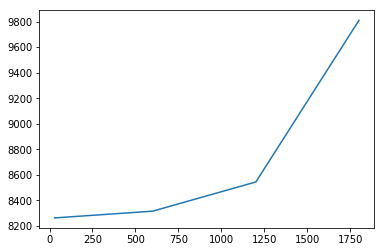

In [34]:
# Master Darks
# 30 second master
dark_30s = []
for i in range(1, 10):
    file = fits.open('../data/30secseries10_4000_neb_darkframes.0000000{0}.DARK.FIT'.format(i))
    dark_30s.append(file[0].data)
    file.close()
    
mdark_30s = np.empty(shape=dark_30s[0].shape)
for i in range(len(dark_30s[0])):
    for j in range(len(dark_30s[0][0])):
        med = []
        for file in dark_30s:
            med.append(file[i][j])
        mdark_30s[i][j] = np.median(med)

print(mdark_30s)


# 10 minute master
dark_10m = []
for i in range(0, 3):
    file = fits.open('../data/10mseries3_4000_neb_darkframes.0000000{0}.DARK.FIT'.format(i))
    dark_10m.append(file[0].data)
    file.close()
    
mdark_10m = np.empty(shape=dark_10m[0].shape)
for i in range(len(dark_10m[0])):
    for j in range(len(dark_10m[0][0])):
        med = []
        for file in dark_10m:
            med.append(file[i][j])
        mdark_10m[i][j] = np.median(med)

print(mdark_10m)


# 20 minute master
dark_20m = []
for i in range(0, 3):
    file = fits.open('../data/20mseries3_4000_neb_darkframes.0000000{0}.DARK.FIT'.format(i))
    dark_20m.append(file[0].data)
    file.close()
    
mdark_20m = np.empty(shape=dark_20m[0].shape)
for i in range(len(dark_20m[0])):
    for j in range(len(dark_20m[0][0])):
        med = []
        for file in dark_20m:
            med.append(file[i][j])
        mdark_20m[i][j] = np.median(med)

print(mdark_20m)


# 30 minute master
dark_30m = []
for i in range(2, 5):
    file = fits.open('../data/30mseries3_4000_neb_darkframes.0000000{0}.DARK.FIT'.format(i))
    dark_30m.append(file[0].data)
    file.close()
    
mdark_30m = np.empty(shape=dark_30m[0].shape)
for i in range(len(dark_30m[0])):
    for j in range(len(dark_30m[0][0])):
        med = []
        for file in dark_30m:
            med.append(file[i][j])
        mdark_30m[i][j] = np.median(med)

print(mdark_30m)

plt.plot([30, 600, 1200, 1800], [np.median(mdark_30s), np.median(mdark_10m), np.median(mdark_20m), np.median(mdark_30m)])